In [1]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# `concept for a np.where`


In [3]:
w = np.array([3443, 3434, 22, 54542, 34342, 3, 434, 4544])
r = np.where(w == 22)[0]
print(r)
a = np.where(w == 22)
print(a)
print()
matrix = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])

indices = np.where(matrix > 4)

# Using np.where(matrix > 4)
print("Output of np.where(matrix > 4):")
print(indices)

# Accessing row indices (first array in the tuple)
row_indices = indices[0]
print("\nRow indices (indices[0]):")
print(row_indices)

# Accessing column indices (second array in the tuple)
column_indices = indices[1]
print("\nColumn indices (indices[1]):")
print(column_indices)


[2]
(array([2]),)

Output of np.where(matrix > 4):
(array([1, 2, 2, 2]), array([2, 0, 1, 2]))

Row indices (indices[0]):
[1 2 2 2]

Column indices (indices[1]):
[2 0 1 2]


# create pairs

In [4]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]
    #print(digit_indices)
    pairs = []
    labels = []

    for idx1 in range(len(x)):
        #adding  match example
        x1 = x[idx1]
        label1 = y[idx1]
        # plt.imshow(x1)
        # plt.show()
        # print(label1)
        # if idx1 == 10:
        #     break
        # print(label1)
        idx2 = np.random.choice(digit_indices[label1]) #for a example label1 equal to 5 so in digit_indices go to list that just have 5 labels and selects randomly one of them!
        x2 = x[idx2]
        pairs += [[x1, x2]]
        labels += [1]
        #adding not match example
        label2 = np.random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = np.random.randint(0, num_classes-1)

        idx2 = np.random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs +=[[x1, x2]]
        labels +=[0]

    return np.array(pairs), np.array(labels)


pairs_train , labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

In [5]:
print(pairs_train.shape)
print(labels_train.shape)


(120000, 2, 28, 28)
(120000,)


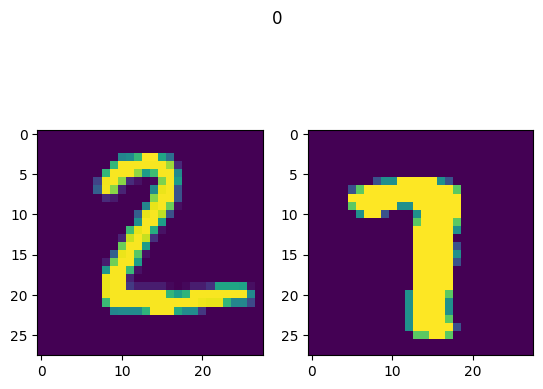

In [15]:
variable = 3
fig, axes = plt.subplots(1, 2)
fig.suptitle(labels_test[variable])

axes[0].imshow(pairs_test[variable, 0])
axes[1].imshow(pairs_test[variable, 1])


In [7]:
input1 = Input(shape=(28, 28))
input2 = Input(shape=(28, 28))

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation="relu"))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation="relu"))

output1 = seq1(input1)
output2 = seq2(input2)

merge_layer = Concatenate()([output1, output2])
dense_layer = Dense(128, activation="relu")(merge_layer)
output_layer = Dense(1, activation="sigmoid")(dense_layer)

model_1 = Model(inputs=[seq1.input, seq2.input], outputs=output_layer)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model_1.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 28, 28)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 128)            │        100,480 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 128)            │        100,480 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ sequential[0][0],      │
│                           │                        │                │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         32,896 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            129 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 233,985 (914.00 KB)

 Trainable params: 233,985 (914.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_1.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=64, epochs= 5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8241 - loss: 0.3608
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9611 - loss: 0.1072
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9759 - loss: 0.0669
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9842 - loss: 0.0443
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9892 - loss: 0.0312


In [10]:
#share wieght
input1 = Input(shape=(28, 28))
input2 = Input(shape=(28, 28))

input = Input((28, 28))

x = Flatten()(input)
x = Dense(128, activation="relu")(x)
x = Dense(128, activation="relu")(x)
dense  = Model(input, x)

#using same network
dense1 = dense(input1)
dense2 = dense(input2)

merge_layer  = Concatenate()([dense1, dense2])

dense_layer = Dense(128, activation="relu")(merge_layer)
output_layer = Dense(1, activation="sigmoid")(dense_layer)

model_2 = Model(inputs=[input1, input2], outputs=output_layer)

In [11]:
model_2.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_5 (Functional) │ (None, 128)            │        116,992 │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256)            │              0 │ functional_5[0][0],    │
│ (Concatenate)             │                        │                │ functional_5[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         32,896 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            129 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 150,017 (586.00 KB)

 Trainable params: 150,017 (586.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_2.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=64, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8458 - loss: 0.3227
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9763 - loss: 0.0668
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9864 - loss: 0.0395
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9910 - loss: 0.0265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9932 - loss: 0.0200


In [13]:
def euclidean_distanse(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)  # Use K.sum and K.square
    return K.sqrt(K.maximum(sum_square, K.epsilon()))  # Use K.sqrt and K.maximum



In [14]:
input1 = Input((28, 28))
input2 = Input((28, 28))

input = Input((28, 28))

x = Flatten()(input)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation="relu")(x)
dense = Model(input, x)


dense1 = dense(input1)
dense2 = dense(input2)

# Wrap the distance function in a Lambda layer
merge_layer = Lambda(euclidean_distanse)([dense1, dense2])

dense_layer = Dense(128, activation="relu")(merge_layer)
dense_layer = Dense(1, activation="sigmoid")(dense_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=(['<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_32>', '<KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_33>'],)
  • kwargs={'mask': ['None', 'None']}

In [ ]:
history = model.fit([pairs_train[:, 0], pairs_train[:, 1]], labels_train, epochs=5, batch_size=64)


In [ ]:
test_loss, test_accuracy = model.evaluate([pairs_test[:, 0], pairs_test[:, 1]], labels_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
